# 实验四：使用决策树与随机森林进行鸢尾花数据集分类 

## 实验介绍
决策树是一类树形的分类算法，它符合人类的认知思维习惯，具有优良的可解释性。而且分类效果一般较好。
随机森林算法是一种在决策树的基础上发展而来的算法，该算法的性能十分优良，采用投票机制，非常
有效的解决了决策树分类中出现的过拟合问题。
在本实验中，我们可视化了一颗分类树，然后利用sklearn实现了随机森林算法，并对算法性能进行了评估。

## 0.导入需要的工具库

In [30]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.datasets import load_iris


## 1.加载数据

In [31]:
# sklearn的数据集中自带鸢尾花数据集
iris = load_iris()

In [32]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [33]:
iris_feature_name = iris.feature_names #数据集中的列名
iris_features = iris.data #数据集中的特征数据
iris_target_name = iris.target_names #数据集中的标签名字
iris_target = iris.target #数据集中的标签数据

In [34]:
# 看一下特征名称
iris_feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
# 特征数据
iris_features[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [36]:
# 标签名称
iris_target_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
# 标签数据
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# 共有150条数据
iris_features.shape

(150, 4)

## 构建决策树模型

In [39]:
# 构建一个决策树模型，树深设置为4
clf = tree.DecisionTreeClassifier(max_depth=4,random_state= 0)
clf = clf.fit(iris_features, iris_target)

In [40]:
clf

DecisionTreeClassifier(max_depth=4, random_state=0)

## 可视化树模型

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

[Text(0.5, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass

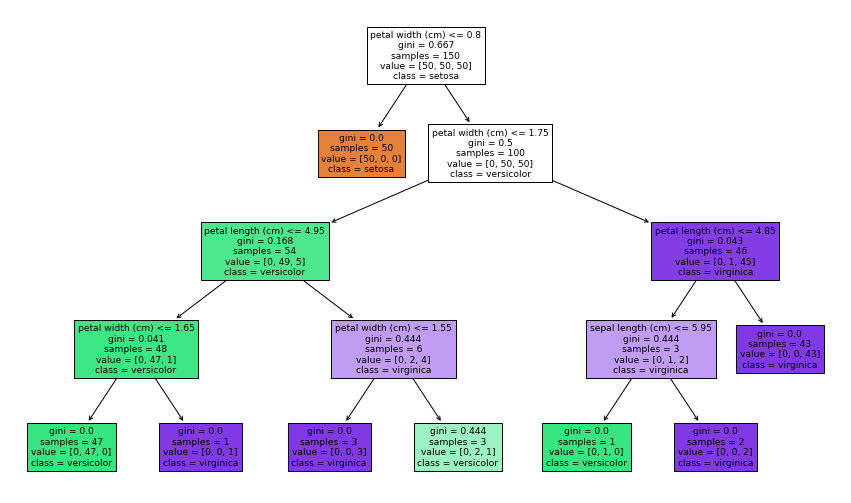

In [42]:
plt.figure(figsize=(15,9))
plot_tree(clf,filled=True,feature_names=iris.feature_names, class_names=iris.target_names)

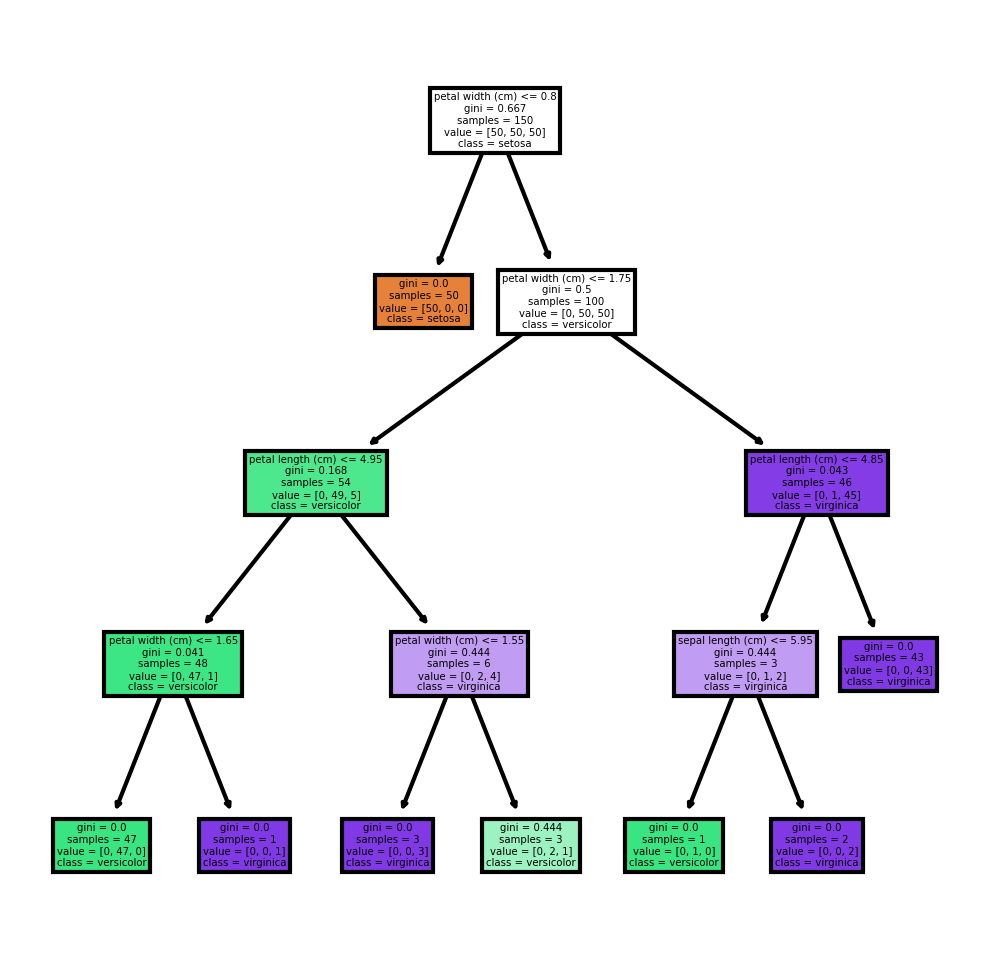

In [43]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names=iris.feature_names, 
               class_names=iris.target_names,
               filled = True);
fig.savefig('imagename.png')

In [13]:
import pydotplus
from IPython.display import Image, display

In [14]:
dot_data = tree.export_graphviz(clf,
                                out_file = None,
                                feature_names = iris_feature_name,
                                class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )

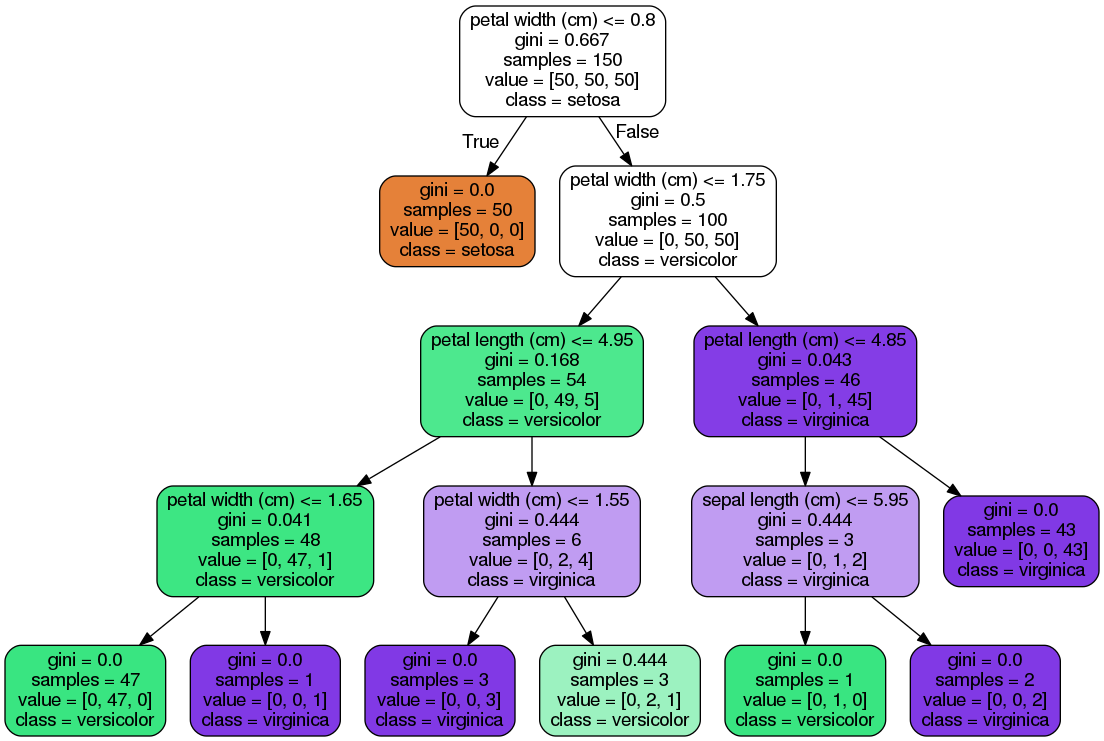

In [16]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

从以上的树中可以看到决策树每次的分裂过程，这样可以对树模型进行解释。因此我们知道树模型具有良好的可解释性。

## 使用随机森林进行预测

随机森林模型是在决策树的基础上进行集成得到的一种集成模型，它是一个包含多个决策树的分类器，并且其输出的类别是由个别树输出的类别的众数而定。这种模型的随机性体现在两个方面。一是每棵树的训练样本是随机的，二是每棵树中用于划分的特征也是随机的。有了这两个随机性，随机森林模型的过拟合现象会大大降低。

In [44]:
# 进行训练集与测试集的切分，测试集的占比为30%
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_features,iris_target,test_size = 0.3,random_state = 0)

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
# 我们设置了5棵分类树，设置最大树深为4
forest = RandomForestClassifier(n_estimators= 5,max_depth= 4,random_state = 0)

In [47]:
# 拟合训练数据
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=5, random_state=0)

In [48]:
# 进行预测
y_pred = forest.predict(X_test)

In [49]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [50]:
# 预测的准确度
sum(y_pred == y_test) / len(y_test)

0.9555555555555556

可以看到，预测的准确度达到了95.56%，说明模型的预测效果是很好的。

## 作业

1.思考树模型与线性模型的区别，在此基础上思考决策树分类和逻辑回归分类的区别。

In [51]:
```Bash
###输入你的作业答案###
线性模型是通过拟合一个函数，来预测未知数据的值，连续的就是回归，如果算概率就是分类，所以对于数值类属性比较合适。我觉得这个模型（函数）的选择是主要问题，如何在未知的情况下探索合适的函数，然后去拟合参数。
决策树是发掘数据本身的特征（数据的分布概率），根据数据的特点去生成可以做决策的树，可解释性比较强，一般这些特征本身就是离散的，或者说比较容易离散化的。再加上ensemble learning，一般的预测精度还是比较理想的。在疾病预测和疾病诊断中有比较多的应用。


###作业答案结束###
```

SyntaxError: invalid syntax (2696063203.py, line 1)